## **Vision and Cognitive Services Lab - Image Filtering**

<center><img src='https://miro.medium.com/max/750/1*Mu7_d3e1qPtW1e7EgsX7LQ.png' width=300px></center>
<p align="justify">



OpenCV (Open source Computer Vision - https://opencv.org/) is a famous programming library for developing real-time computer vision applications. 

*   Cross-platform;
*   Free functions to be used under the open-source BSD license:
  * Pixel-level image manipulation, camera calibration, 3-D reconstruction, feature points detectors, matching algorithms, motion extraction, feature tracking;
*   Support for models developed with various deep learning frameworks (e.g., TensorFlow, PyTorch, Caffe);
*   Combined with machine learning and DNN modules for image and video manipulation;
*  OpenCV Documentation: (https://docs.opencv.org/).

![Lane_Detection](https://s4.gifyu.com/images/Lane_detection_VCS.gif "Lane Detection") ![Object_Detection](https://s4.gifyu.com/images/Object_detection_VCS32a476f06e3b14cc.gif "Object Detection") ![Text_Detection](https://s4.gifyu.com/images/Text_detection_VCS.gif "Text Detection") ![Text_Recognition](https://s4.gifyu.com/images/Object_Recognition_VCS.gif "Object Recognition") ![Follower](https://s4.gifyu.com/images/Follower_VCS.gif "Follower") ![Image_Segmentation](https://s4.gifyu.com/images/Segmentation_VCS.gif "Image Segmentation")




## **Load and visualize an image**

"Lena" Properties
Number of Pixels: 786432
Image (RGB) shape: (512, 512, 3)
Image (GRAY) shape: (512, 512)
Image type:  <class 'numpy.ndarray'>


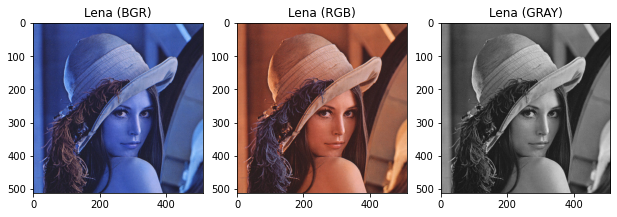

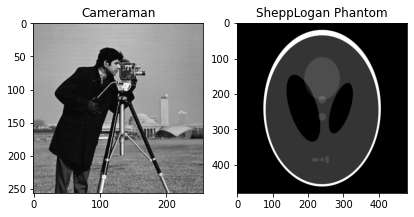

In [1]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Read images into the workspace
# retval	=	cv.imread(	filename[, flags]	)
lena = cv2.imread('images/lena.bmp') # BGR image
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) # RGB image
lena_gs = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # GS image
# # Convert image to grayscale when importing
# lena_gs = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE) 
cameraman = cv2.imread('images/cameraman.tif')
sp_phantom = cv2.imread('images/SheppLogan_Phantom.png')

# Plot rgb/grayscale images
plt.figure(figsize=(14, 7))
plt.subplot(1,4,1)
plt.imshow(lena)
plt.title('Lena (BGR)')
plt.subplot(1,4,2)
plt.imshow(lena_rgb)
plt.title('Lena (RGB)')
plt.subplot(1,4,3)
plt.imshow(lena_gs, cmap=plt.cm.gray)
plt.title('Lena (GRAY)')

plt.figure(figsize=(14, 7))
plt.subplot(1,4,1)
plt.imshow(cameraman)
plt.title('Cameraman')
plt.subplot(1,4,2)
plt.imshow(sp_phantom)
plt.title('SheppLogan Phantom')

# Print images properties
print('"Lena" Properties')
print("Number of Pixels: " + str(lena_rgb.size))
print("Image (RGB) shape: " + str(lena_rgb.shape))
print("Image (GRAY) shape: " + str(lena_gs.shape))
print("Image type:  " + str(type(lena_rgb)))

# Save image shape
(height, width, channels) = lena_rgb.shape

## **Image histogram**

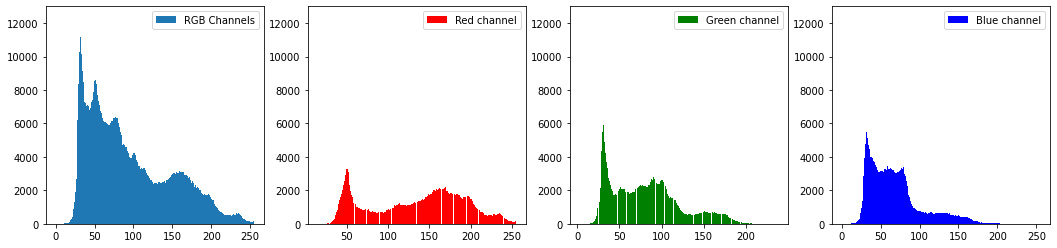

In [2]:
# Compute image histogram using matplotlib library
# Find frequency of pixels in range 0-255
plt.figure(figsize=(18,4))
plt.subplot(1,4,1), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb.flatten(), bins = 256)
_ = plt.legend(['RGB Channels'])
plt.subplot(1,4,2), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 0].flatten(), bins = 256, color = 'r')
_ = plt.legend(['Red channel'])
plt.subplot(1,4,3), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 1].flatten(), bins = 256, color = 'g')
_ = plt.legend(['Green channel'])
plt.subplot(1,4,4), plt.ylim(0, 13000)
_ = plt.hist(lena_rgb[:, :, 2].flatten(), bins = 256, color = 'b')
_ = plt.legend(['Blue channel'])

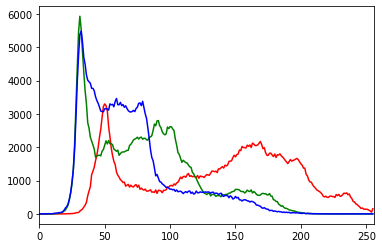

In [3]:
# Image histogram using OpenCV 
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) → hist
color = ('r','g','b')
for i, col in enumerate(color):
    hist = cv2.calcHist([lena_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color = col)
    plt.xlim([0,256])

In [4]:
def plot_images(images):
  ''' 
  Plot input BGR images as RGB images
  
  Input: list 
    List of BGR images
  '''

  fig, ax = plt.subplots(nrows = 1, ncols = len(images), figsize = (4*len(images), 4*len(images)))
  for i, p in enumerate(images):
    ax[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
  plt.show()

## **Split and Merge Image Channels**

Blue channel shape: (512, 512)


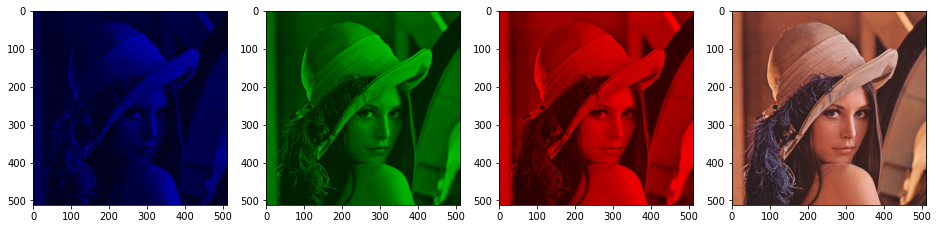

In [5]:
#cv2.split(m[, mv]) → mv
# Warning: cv2.split() is a costly operation (in terms of time). 
# So do it only if you need it. Otherwise go for Numpy indexing.
blue_ch, green_ch, red_ch = cv2.split(lena)
print("Blue channel shape: " + str(blue_ch.shape))

# cv2.merge(mv[, dst]) → dst
# Creates one multichannel array out of several single-channel ones.
zeros = np.zeros(blue_ch.shape, np.uint8)
lena_blue = cv2.merge((blue_ch, zeros, zeros))
lena_green = cv2.merge((zeros, green_ch, zeros))
lena_red = cv2.merge((zeros, zeros, red_ch))
# Plot all images
plot_images([lena_blue, lena_green, lena_red, lena])

## **Image Thresholding**

Image thresholding can be used to segment an image. Setting all pixel values above the threshold to a maximum value (e.g., 255) and below the threshold to zero, we get a binary image.

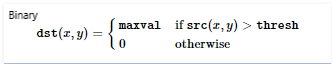

In the following, we will set to zero all pixel values below four fixed thresholds (e.g., 30, 60, 90 and 120) and plot the resulting images.



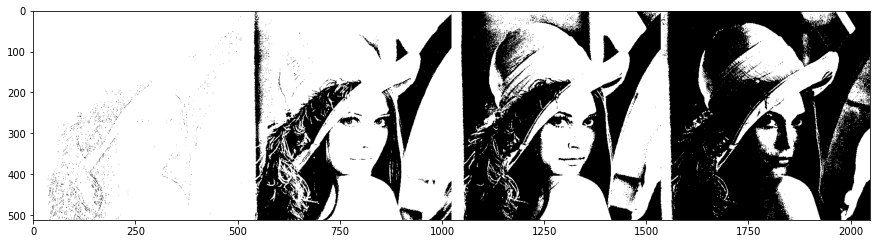

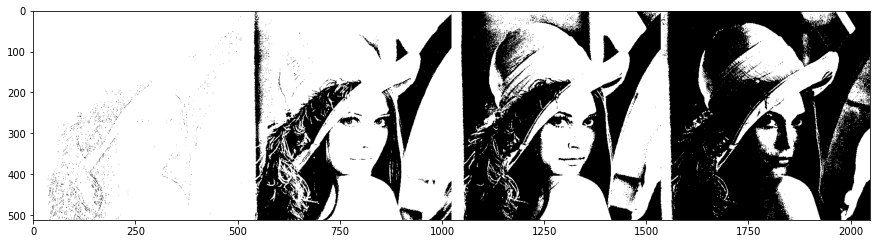

In [6]:
# Perform binary thresholding using four different values: 30, 60, 90, 120.
# As input image, use a grayscale image. 

# Using Numpy 
thr1 = np.where(lena_gs <= 30,  0, 255)
thr2 = np.where(lena_gs <= 60,  0, 255)
thr3 = np.where(lena_gs <= 90,  0, 255)
thr4 = np.where(lena_gs <= 120, 0, 255)
plt.figure(figsize=(15,10))
imgs = np.hstack((thr1, thr2, thr3, thr4))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

# Opencv2 example
# cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
# It returns the used threshold and the thresholded image.
_, thr1 = cv2.threshold(lena_gs,  30, 255, cv2.THRESH_BINARY)
_, thr2 = cv2.threshold(lena_gs,  60, 255, cv2.THRESH_BINARY)
_, thr3 = cv2.threshold(lena_gs,  90, 255, cv2.THRESH_BINARY)
_, thr4 = cv2.threshold(lena_gs, 120, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(15,10))
imgs = np.hstack((thr1, thr2, thr3, thr4))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

## **Image rotation**

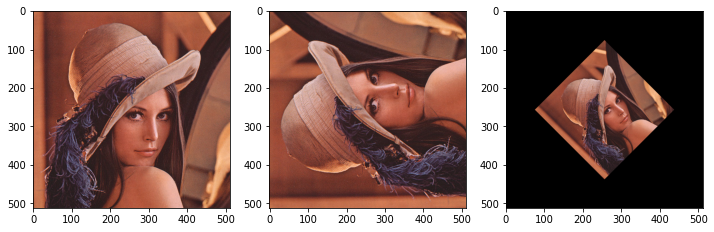

Rotation matrix (90 deg):
[[ 6.12323400e-17  1.00000000e+00 -2.84217094e-14]
 [-1.00000000e+00  6.12323400e-17  5.12000000e+02]]


Rotation (45 deg) + scaling (1/2) matrix :
[[  0.35355339   0.35355339  74.98066402]
 [ -0.35355339   0.35355339 256.        ]]




In [7]:
# Rotate input image by 90 degrees 
# Firstly, you need to compute the rotation matrix and then apply it to the input image
# cv2.getRotationMatrix2D(center, angle, scale) → retval
# Calculate an affine matrix of 2D rotation.
rot_mat_90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
# cv.WarpAffine(src, dst, mapMatrix, flags=CV_INTER_LINEAR+CV_WARP_FILL_OUTLIERS, fillval=(0, 0, 0, 0)) → None
# Apply an affine transformation to the input image.
lena_90 = cv2.warpAffine(lena, rot_mat_90, (width, height)) # define output size

# Rotate by 45 degrees and set scale to 0.5
rot_scalmat_45 = cv2.getRotationMatrix2D((width/2, height/2), 45, 0.5)
lena_45_scaled = cv2.warpAffine(lena, rot_scalmat_45, (width, height))
plot_images([lena, lena_90, lena_45_scaled])
print(f"Rotation matrix (90 deg):\n{rot_mat_90}\n\n")
print(f"Rotation (45 deg) + scaling (1/2) matrix :\n{rot_scalmat_45}\n\n")

## **Image Resizing and Cropping**

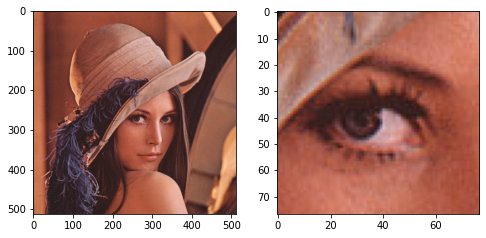

In [8]:
startRow = int(height * .45)
startCol = int(width  * .45)
endRow   = int(height * .60)
endCol   = int(width  * .60)

lena_cropped = lena[startRow:endRow, startCol:endCol]
plot_images([lena, lena_cropped])

Original image (shape): (512, 512)
Scaled image (shape):  (200, 300)


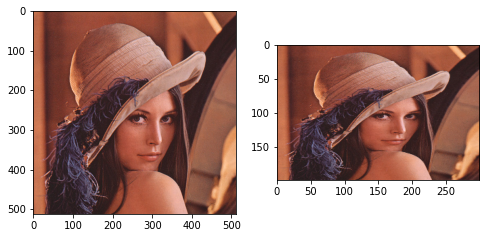

In [9]:
# Resizes an image
# cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
lena_resized = cv2.resize(lena, (300, 200)) # (width, height)
print("Original image (shape): " + str(lena.shape[:-1]))
print("Scaled image (shape):  " + str(lena_resized.shape[:-1]))
plot_images([lena, lena_resized])

# **2-D Convolution**
2-D convolution can be used to apply smoothing, sharpening or edge detection filters to our images. Convolution operator uses the input image and the kernel which serves as a filter. The output image is produced by sliding the kernel over the input image.

[Here](https://setosa.io/ev/image-kernels/) you can see the output of a number of filters.

# **Ex. 1 - Box Blur (box linear filter)**

A box filter sets the value of the output pixel to the average of the pixel values in the neighborhood around the corresponding input pixel. In this exercise, you will implement the 2-D convolution operation without using the OpenCV library. You will consider a grayscale input image, stride equals to 1, and a kxk blur filter (k is an input parameter) to obtain a blurred image as output. Input and output images should have the same spatial size.

Tip: Use zero-padding to get the same spatial size for both input and output images. The padding value should be set to $\frac{k-1}{2}$, where $k$ is the kernel size.


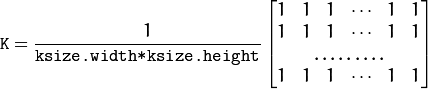

In [10]:
def box_filter(image, kernel_size):
    '''
    Apply a kxk box filter to the input image.
    Inputs
    -----------
    image: np.array
    Input image.
    kernel_size: int 
    Size of the squared kernel.
    Outputs
    -------
    output: np.array
    Filtered image.
    '''
  # Initialize output image
    output = np.zeros(np.shape(image))

  # Kernel definition
    k = kernel_size
    kernel = np.ones((k,k))/(k**2)
        
  ## ZERO PADDING SECTION
  # Define padding size
    p_size = int((k-1)/2)
  # Add zeros to the input image
    n,m = np.shape(image)
    paddle = np.zeros((n+2*p_size,m+2*p_size))
    paddle[p_size:n+p_size,p_size:m+p_size] = image

  ## 2-D CONVOLUTION
  # Loop over all pixels of the input image
  # Extract a kxk patch and convolve it with the kernel
    for i in range(len(paddle)-k+1):
        for j in range(len(paddle)-k+1):
            patch = paddle[i:i+k,j:j+k]
            output[i,j] = np.sum(patch*kernel)

    return output

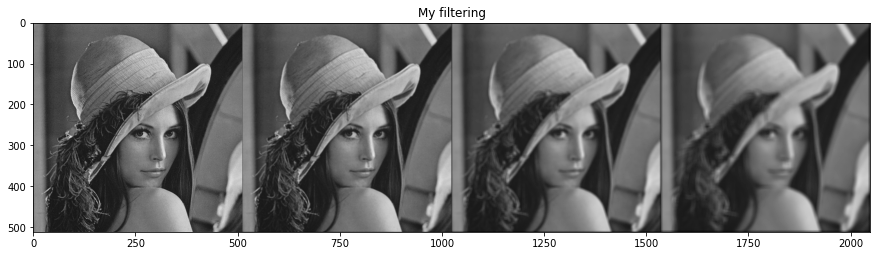

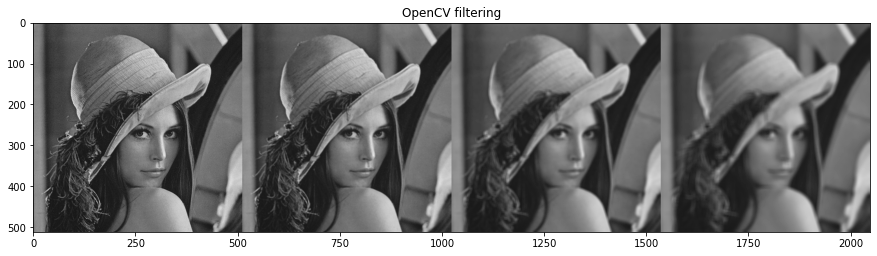

In [11]:
# Apply your box filter to the lena_gs image.
# Use as kernel size 3, 7 and 11.
lena_box3 = box_filter(lena_gs, 3)
lena_box7 = box_filter(lena_gs, 7)
lena_box11 = box_filter(lena_gs, 11)
plt.figure(figsize=(15,10))
plt.title("My filtering")
imgs = np.hstack((lena_gs, lena_box3, lena_box7, lena_box11))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

# OpenCV provides several predefined filters.
# We will use the box filter.
# cv2.blur(src, ksize[, dst[, anchor[, borderType]]]) → dst
lena_box3_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (3,3))
lena_box7_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (7,7))
lena_box11_cv = cv2.blur(np.asarray(lena_gs, dtype=np.float32), (11,11))
plt.figure(figsize=(15,10))
plt.title("OpenCV filtering")
imgs = np.hstack((lena_gs, lena_box3_cv, lena_box7_cv, lena_box11_cv))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

In [12]:
print("Results checking...")
print("Difference between output images (3x3 kernel): " + str(np.sum(np.abs(lena_box3 - lena_box3_cv))))
print("Difference between output images (7x7 kernel): " + str(np.sum(np.abs(lena_box7 - lena_box7_cv))))
print("Difference between output images (11x11 kernel): " + str(np.sum(np.abs(lena_box11 - lena_box11_cv))))

Results checking...
Difference between output images (3x3 kernel): 72895.30472946179
Difference between output images (7x7 kernel): 187620.2773349529
Difference between output images (11x11 kernel): 298443.35630911833


In [13]:
print("Results checking (without borders)...")
# Remove borders from output images
cropped_diff_3 = lena_box3[1:-1, 1:-1] - lena_box3_cv[1:-1, 1:-1]
cropped_diff_7 = lena_box7[3:-3, 3:-3] - lena_box7_cv[3:-3, 3:-3]
cropped_diff_11 = lena_box11[5:-5, 5:-5] - lena_box11_cv[5:-5, 5:-5]

print("Difference between output images (3x3 kernel): " + str(np.sum(np.abs(cropped_diff_3))))
print("Difference between output images (7x7 kernel): " + str(np.sum(np.abs(cropped_diff_7))))
print("Difference between output images (11x11 kernel): " + str(np.sum(np.abs(cropped_diff_11))))

Results checking (without borders)...
Difference between output images (3x3 kernel): 0.5268881057303183
Difference between output images (7x7 kernel): 0.5223011873621033
Difference between output images (11x11 kernel): 0.5136004676584562


# **Noise Removal**

<p align="justify">Image noise is an undesired effect produced by image sensors or external factors which may obscure the information.</p>

**Noise Removal by Linear Filtering**

<p align="justify">Linear filtering can be used to remove certain types of noise. The following example shows how to remove salt and pepper noise from an image using a median filter (box filter can also be used). Using the median filter, the value of the output pixel is defined by the median of the neighborhood pixels, rather than the mean. For this reason, the median filter is less sensitive than the mean filter to extreme values (outliers) and it does not reduce the sharpness of the image.</p>

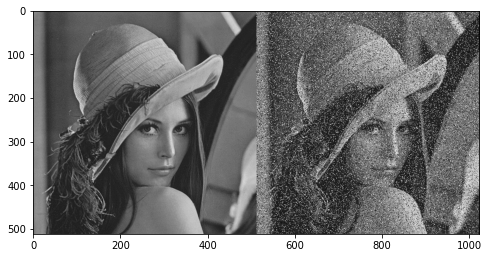

In [14]:
def salt_pepper_noise(image, ratio, amount):
  '''
    Simulate salt&pepper noise for the input grayscale image.
    
    Inputs:
    image: np.array()
      Input image (NxM matrix, one channel)
    ratio: float between 0 and 1
      Salt and pepper noise ratio.
    amount:  float between 0 and 1
      Amount of noise.
  '''
  
  # Check input parameters
  assert len(image.shape) == 2, f"Input image has {image.shape[-1]} channels. \
                                  Grayscale image is required."
  assert 0 <= ratio <= 1., "Ratio parameter is not between 0 and 1."
  assert 0. <= amount <= 1., "Amount parameter is not between 0 and 1."
  
  # Extract image dimensions
  row, col = image.shape
  output = np.copy(image)
  
  # Apply salt noise on each pixel individually
  num_salt = np.ceil(amount * image.size * ratio)
  # Pixel coordinates to set to 255 (salt)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 255

  # Apply pepper noise on each pixel individually
  num_pepper = np.ceil(amount * image.size * (1. - ratio))
  coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
  for i in zip(coords[0], coords[1]):
    output[i] = 0

  return output

lena_salt_pepper = salt_pepper_noise(lena_gs, 0.5, 0.2)
plt.figure(figsize=(8,6))
imgs = np.hstack([lena_gs, lena_salt_pepper])
_ = plt.imshow(imgs, cmap=plt.cm.gray)

# **Ex. 2 - Median filter**

<p align="justify">In this exercise, you will implement the median filter replacing each pixel of the input image with the median of its neighborhood. The median value is computed by sorting all the neighborhood values of the selected pixel in ascending order and then by replacing its value by the pixel value in the middle. Input and output images must have the same spatial size. The kernel size must be an odd number.


</p>

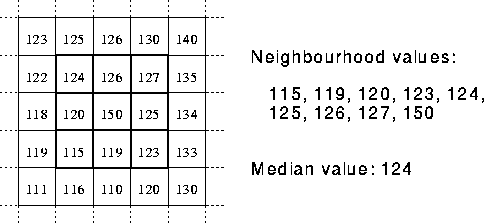

In [15]:
def median_filter(image, kernel_size, padding=True):
    '''
      This function applies the median filter to the input image.
  
      Inputs
      -----------
      image: np.array
        Input grayscale image
      kernel_size: int 
        Dimension of a squared kernel.
      padding: bool
        If False, input image already padded.

      Output
      -----------
      output: np.array
        Filtered image
    '''
  # Check input parameters
    assert len(image.shape) == 2, f"Input image has {image.shape[-1]} channels. \
                                  Grayscale image is required."
    assert kernel_size % 2 != 0 , "Kernel size is not odd number."

  # No need to define a kernel
 
  ## PADDING SECTION
  # Define padding size
    k = kernel_size
    if padding:
        n,m = np.shape(image)
        # Define padding size
        p_size = int((k-1)/2)
        # Pad image with zeros
        paddle = np.zeros((n+2*p_size,m+2*p_size))
        paddle[p_size:n+p_size,p_size:m+p_size] = image
        image = paddle

  # Initialize output image
    n,m = np.shape(image)
    n,m = n - k + 1, m - k + 1, 
    output = np.zeros((n,m))

  ## Apply median filter
    for i in range(n):
            for j in range(m):
                patch = image[i:i+k,j:j+k]
                output[i,j] = np.median(patch)
    
  # Loop over all pixels of the input image
  
    return output

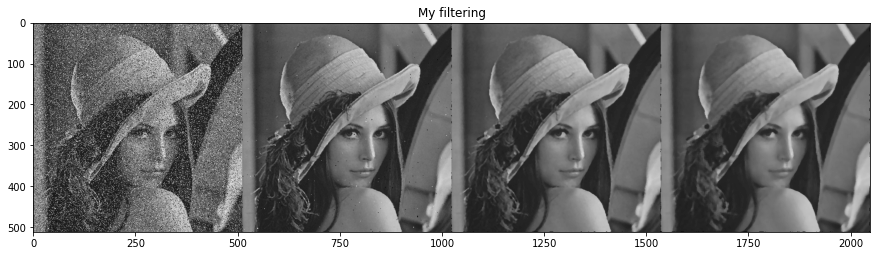

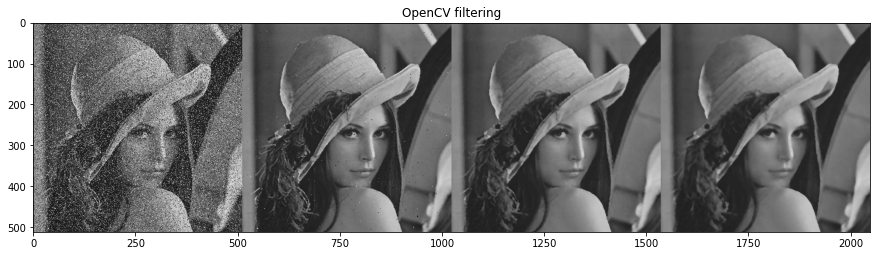

In [16]:
# Apply your median filter to the lena_salt_pepper image.
# Use as kernel size: 3, 5 and 7.
lena_median3 = median_filter(lena_salt_pepper, 3)
lena_median5 = median_filter(lena_salt_pepper, 5)
lena_median7 = median_filter(lena_salt_pepper, 7)
plt.figure(figsize=(15,10))
plt.title("My filtering")
imgs = np.hstack((lena_salt_pepper, lena_median3, lena_median5, lena_median7))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

# We will now use the median filter provided by OpenCV.
# cv2.medianBlur(src, ksize[, dst]) → dst
lena_median3_cv = cv2.medianBlur(lena_salt_pepper, 3)
lena_median5_cv = cv2.medianBlur(lena_salt_pepper, 5)
lena_median7_cv = cv2.medianBlur(lena_salt_pepper, 7)
plt.figure(figsize=(15,10))
plt.title("OpenCV filtering")
imgs = np.hstack((lena_salt_pepper, lena_median3_cv, lena_median5_cv, lena_median7_cv))
_ = plt.imshow(imgs, cmap=plt.cm.gray)

In [17]:
print("Results checking...")
print("Difference between output images (3x3 kernel): " + str(np.sum(np.abs(lena_median3 - lena_median3_cv))))
print("Difference between output images (5x5 kernel): " + str(np.sum(np.abs(lena_median5 - lena_median5_cv))))
print("Difference between output images (7x7 kernel): " + str(np.sum(np.abs(lena_median7 - lena_median7_cv))))

Results checking...
Difference between output images (3x3 kernel): 20246.0
Difference between output images (5x5 kernel): 39202.0
Difference between output images (7x7 kernel): 66464.0


In [18]:
print("Results checking (without borders)...")
# Remove borders from output images
cropped_diff_3 = lena_median3[1:-1, 1:-1] - lena_median3_cv[1:-1, 1:-1]
cropped_diff_5 = lena_median5[2:-2, 2:-2] - lena_median5_cv[2:-2, 2:-2]
cropped_diff_7 = lena_median7[3:-3, 3:-3] - lena_median7_cv[3:-3, 3:-3]

print("Difference between output images (3x3 kernel): " + str(np.sum(np.abs(cropped_diff_3))))
print("Difference between output images (5x5 kernel): " + str(np.sum(np.abs(cropped_diff_5))))
print("Difference between output images (7x7 kernel): " + str(np.sum(np.abs(cropped_diff_7))))

Results checking (without borders)...
Difference between output images (3x3 kernel): 0.0
Difference between output images (5x5 kernel): 0.0
Difference between output images (7x7 kernel): 0.0


In [19]:
# Form a border around an image.
# cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]]) → dst
# Note: The median filter uses cv2.BORDER_REPLICATE internally to cope with border pixels.
lena_salt_pepper_rep_b1 = cv2.copyMakeBorder(lena_salt_pepper, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b2 = cv2.copyMakeBorder(lena_salt_pepper, 2, 2, 2, 2, cv2.BORDER_REPLICATE)
lena_salt_pepper_rep_b3 = cv2.copyMakeBorder(lena_salt_pepper, 3, 3, 3, 3, cv2.BORDER_REPLICATE)

lena_median_rep_borders3 = median_filter(lena_salt_pepper_rep_b1, 3, padding=False)
lena_median_rep_borders5 = median_filter(lena_salt_pepper_rep_b2, 5, padding=False)
lena_median_rep_borders7 = median_filter(lena_salt_pepper_rep_b3, 7, padding=False)

diff_3 = lena_median_rep_borders3 - lena_median3_cv
diff_5 = lena_median_rep_borders5 - lena_median5_cv
diff_7 = lena_median_rep_borders7 - lena_median7_cv
print("Difference between output images (3x3 kernel): " + str(np.sum(np.abs(diff_3))))
print("Difference between output images (5x5 kernel): " + str(np.sum(np.abs(diff_5))))
print("Difference between output images (7x7 kernel): " + str(np.sum(np.abs(diff_7))))


Difference between output images (3x3 kernel): 0.0
Difference between output images (5x5 kernel): 0.0
Difference between output images (7x7 kernel): 0.0


# **Filter2D function**

OpenCV provides a function for applying an arbitrary linear filter to an image.

*cv2.filter2D* function convolves an image with a kernel ([cv2.filter2D](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)).

cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) → dst


In [20]:
def my_filters(image):
  '''
  This function defines several filters which are then applied to the input image using
  the filter2D function.
  ''' 

  # Check input parameter
  assert len(image.shape) == 2, f"Input image has {image.shape[-1]} channels. \
                                  Grayscale image is required."
  # Define the kernel size
  kernel_size = 3

  # This filter has no effects on the image
  kernel_orig = np.zeros((kernel_size,kernel_size)) 
  kernel_orig[1,1] = 1

  # Shift all pixels on the right by one pixel
  kernel_shift = np.zeros((kernel_size, kernel_size))
  kernel_shift[1,2] = 1

  # Box Filter
  kernel_blur = 1/(kernel_size**2) * np.ones((kernel_size,kernel_size)) 

  # Horizontal_blur
  horizontal_blur = np.zeros((kernel_size,kernel_size))
  horizontal_blur[1, :] = 1/kernel_size

  # Vertical_blur
  vertical_blur = np.zeros((kernel_size,kernel_size))
  vertical_blur[:, 1] = 1/kernel_size

  # Print all filters
  print(f"No effect filter:\n{kernel_orig}\n\n")
  print(f"Shift filter:\n{kernel_shift}\n\n")
  print(f"Blur filter: \n{kernel_blur}\n\n")
  print(f"Horizontal blur filter:\n{horizontal_blur}\n\n")
  print(f"Vertical blur filter:\n{vertical_blur}\n\n")

  # Apply filters
  img_orig  = cv2.filter2D(image, -1, kernel_orig)
  img_shift = cv2.filter2D(image, -1, kernel_shift)
  img_blur  = cv2.filter2D(image, -1, kernel_blur)
  img_hblur = cv2.filter2D(image, -1, horizontal_blur)
  img_vblur = cv2.filter2D(image, -1, vertical_blur)

  return (img_orig, img_shift, img_blur, img_hblur, img_vblur)

No effect filter:
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


Shift filter:
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


Blur filter: 
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Horizontal blur filter:
[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.         0.         0.        ]]


Vertical blur filter:
[[0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.33333333 0.        ]]




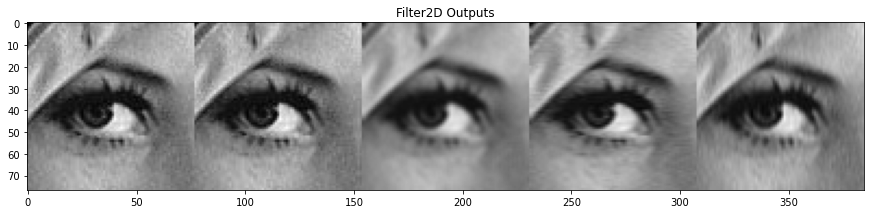

In [21]:
lena_cropped_gs = cv2.cvtColor(lena_cropped, cv2.COLOR_BGR2GRAY) # GS image
output_images = my_filters(lena_cropped_gs)
plt.figure(figsize=(15,10))
plt.title("Filter2D Outputs")
_ = plt.imshow(np.hstack(output_images), cmap=plt.cm.gray)

## Ex. 3 - Change the kernel size to 7

# **Sharpening filter**

<p align="justify">While in blurring we reduce the edge content, with sharpening we increase the edge content. A sharpening filter can be obtained in two steps: given the smoothed (blurred) image, it subtracts this image from the original one to obtain the "details", and then adds the "details" to the original image.</p>

Step 1: Original - Smoothed = Details

Step 2: Original + k * Details = Sharpened

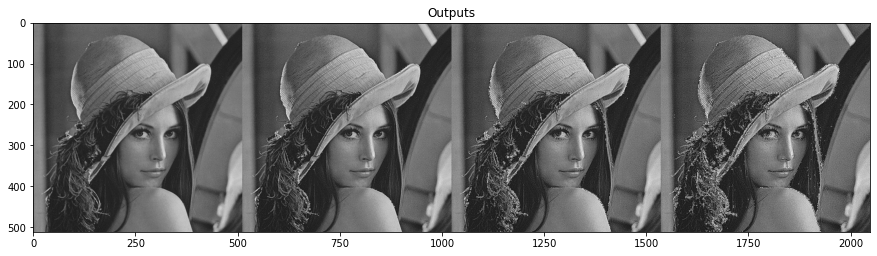

In [22]:
# Example of a 3x3 sharpening filter 
# Step 1
kernel_size = 3
kernel_blur = 1/(kernel_size ** 2) * np.ones((3,3))

# Apply convolution
lena_blur = cv2.filter2D(lena_gs, -1, kernel_blur)

# "detail" image
lena_details = lena_gs - lena_blur

# Step 2
# Get the sharpened image
lena_sharp1 = lena_gs + 1  * lena_details
lena_sharp2 = lena_gs + 2  * lena_details
lena_sharp3 = lena_gs + 3  * lena_details

# Plot results
plt.figure(figsize=(15,10))
plt.title("Outputs")
images = np.hstack([lena_gs, lena_sharp1, lena_sharp2, lena_sharp3])
_ = plt.imshow(images, cmap=plt.cm.gray)

## **Contra-harmonic mean filter**

The contra-harmonic mean filter is a non-linear mean filter typically used for removing several types of noise (e.g., Gaussian noise, salt&pepper noise, ...). One parameter must be defined, i.e., the filter order Q. Positive values of Q eliminate pepper noise, while negative values of Q eliminate salt noise.

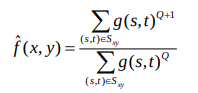

In [23]:
def contraharmonic_mean(image, kernel_size, Q):
  '''
  Apply a contraharmonic filter to the input image.

  Inputs:
  image: np.array
    Grayscale image
  kernel_size: int
  Q: int
    Order of the filter
  Output:
    output: np.array
    Filter image
  '''

  num = np.power(image, Q + 1)
  denom = np.power(image, Q)
  kernel = np.full(kernel_size, 1.0)
  result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
  return result

Text(0.5, 1.0, 'Filtered image')

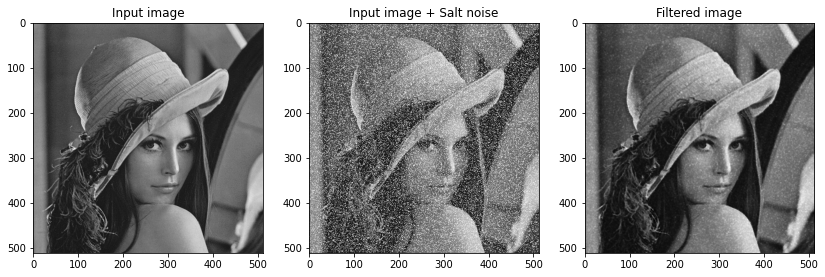

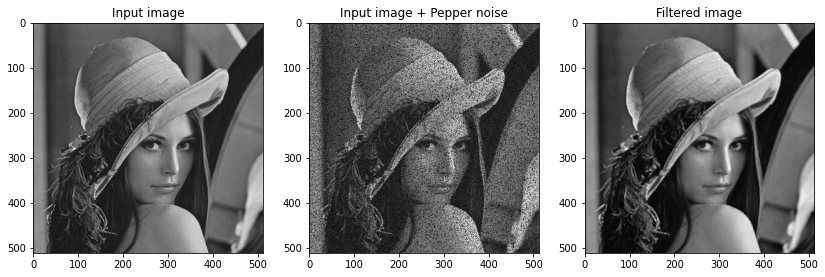

In [24]:
plt.figure(figsize=(14,10))
# Add salt noise only
lena_noisy_salt = salt_pepper_noise(lena_gs, 1, 0.2)
plt.subplot(1,3,1)
plt.imshow(lena_gs, cmap=plt.cm.gray)
plt.title('Input image')
plt.subplot(1,3,2)
plt.imshow(lena_noisy_salt, cmap=plt.cm.gray)
plt.title('Input image + Salt noise')
# Apply filter
filtered_lena_noisy_salt = contraharmonic_mean(lena_noisy_salt, (3,3), -1.5)
plt.subplot(1,3,3)
plt.imshow(filtered_lena_noisy_salt, cmap=plt.cm.gray)
plt.title('Filtered image')

plt.figure(figsize=(14,10))
# Add pepper noise only
lena_noisy_pepper = salt_pepper_noise(lena_gs, 0, 0.2)
plt.subplot(1,3,1)
plt.imshow(lena_gs, cmap=plt.cm.gray)
plt.title('Input image')
plt.subplot(1,3,2)
plt.imshow(lena_noisy_pepper, cmap=plt.cm.gray)
plt.title('Input image + Pepper noise')
# Apply filter
filtered_lena_noisy_pepper = contraharmonic_mean(lena_noisy_pepper, (3,3), 1.5)
plt.subplot(1,3,3)
plt.imshow(filtered_lena_noisy_pepper, cmap=plt.cm.gray)
plt.title('Filtered image')